# Text Generation Machine Learning Project (GAN-Dalf)

*Designing Deep Learning models for memorable quote generation using Natural Language Processing, LSTM and GANs.*

<table align="center"> 
<tr><td width="100000"><img src="../resources/writing.jpg" style="width:140000000;height:1500"></td> 
<td style="image-align:center"> 
</td></tr> 
</table>

### Introduction
Text Generation is currently one of the most challenging fields in the Artificial Intelligence spectrum. The purpose of this project is to generate memorable movie quotes by the use of Natural Language Processing tecniques, Long-Short-Term Memory neural networks and Generative Adversarial Networks. The results of this investigation serves as an introduction to the complexity of the matter at hand, revealing interesting new paths for future projects.

## 0. Project Imports & Paths

In [1]:
import os, sys
import pandas as pd

import tensorflow as tf

# Appending Project Root Path for utils imports
root = os.path.dirname(os.getcwd())
sys.path.append(root)

from src.utils.mining_data_tb import QuoteCleaner, extra_quotes
from src.utils.models import LSTM_Generator, GAN
from src.utils.apis_tb import FlaskFuncs
from src.utils.visualization_tb import Visualizer

# Settings path
settings_file = root + os.sep + 'src' + os.sep + "utils" + os.sep + "settings_sql.json"
# Reports path
reports = root + os.sep + 'reports'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jgnsa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## 1. Data Mining

This project uses **Cornell Movie-Quotes Corpus v1.0 (released July 2012)**, which consists in a collection of all-time memorable movie quotes, to which personal favourites were included. The data was cleaned and structured before attempting the preprocessing phase.

reference link: https://www.cs.cornell.edu/~cristian/memorability.html

In [2]:
# Base Data Path
raw_path = root + os.sep + 'data' + os.sep + 'moviequotes.memorable_quotes.txt'

# Class instance of QuoteCleaner, designed to clean the input data and convert it into a csv dataframe.
q = QuoteCleaner(raw_path)
q.add_quotes(extra_quotes)
q.save_quote_df(root + os.sep + 'data' + os.sep + 'BASE.csv')

# The possibility of cleaning raw text files was implemented.
dirname = root + os.sep + 'data'
q.clean_text(dirname,  '01 - The Fellowship Of The Ring.txt')

Successfully saved Dataframe.
Obtained corpus text from 01 - The Fellowship Of The Ring.txt


In [2]:
df = pd.read_csv(root + os.sep + 'data'+ os.sep + 'BASE.csv', index_col=0)
df

,title,quote
0,10 things i hate about you,Who knocked up your sister?
1,10 things i hate about you,"I was watching you out there, before. I've nev..."
2,10 things i hate about you,"You're 18, you don't know what you want. And y..."
3,10 things i hate about you,"Ooh, see that, there. Who needs affection when..."
4,10 things i hate about you,"Just 'cause you're beautiful, that doesn't mea..."
...,...,...
6289,the lord of the rings: the fellowship of the ring,"If by my life or death I can protect you, I wi..."
6290,the lord of the rings: the return of the king,Certainty of death. Small chance of success. W...
6291,the lord of the rings: the return of the king,The journey doesn't end here. Death is just an...
6292,the lord of the rings: the return of the king,I see in your eyes the same fear that would ta...


## 2. Text Generation Modeling

### Preprocessing

The movie quotes were joined into a single corpus. The main reason for this was that the input size in a single model should be of a fixed length. The corpus was tokenized and converted into one-hot arrays. Two types of NLP tecniques were applied:

- Character-Level: Division into sequences of the same character length. These model types search for correlations between characters rather than words. This results in easily trainable models with reasonable outputs for the LSTM type models. Due to the corpus length and low computational demand, this method proved to be the most efficient regardless of its limitations.

- Word-Level: This technique of tokenizing the corpus at a word scale is the preferred preprocessing technique for the most complex models. This adds a higher compleity to the size of the input arrays, resulting in high-demand computational processing. Due to the user's hardware limitations, word-based models could not be trained as much as it was desired. In addition, word-based models require extense corpus texts in order to find correlations.

The main corpus was passed into lowercase characters, serving as input for the character-based models. For word preprocessing, the corpus text was stripped from any type of string punctuation.

The sequence length for character-based models was established as the mean length of every quote (40 characters) resulting in input array of shape (40, 52). On the other hand, sequence length for word-based models was established to 5 words for simplifying training, in expense to worst results orverall. A parameter was created for just taking into account the most frequent words, meaning that words which appear in the whole corpus with a frequency of less than 2 were not added into the token dictionary, reducing the number of input columns.

_Temperature sampling_: A standard technique introduced into the model prediction functions for improving the quality of samples from language models. Temperature sampling also introduces semantic distortions in the process, so each case may have its unique temperature value (default = 1).

## 2.1 LSTM Models

These models take an input array in order to predict the next word/character. Character-based LSTM models had a total of 52 unique characters, which resulted in shorter training preriods. Word-based models on the other hand were much more complex and due to memory problems the arrays introduced had to contain much shorter sequences.

The batch size for each epoch was established by default in 128 for each epoch.

### 2.1.1 Character-level LSTM

In [3]:
char_base_model = LSTM_Generator(df)

Corpus length: 664235
Total chars: 52
Number of sequences: 221399
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               92672     
_________________________________________________________________
dense (Dense)                (None, 52)                6708      
Total params: 99,380
Trainable params: 99,380
Non-trainable params: 0
_________________________________________________________________


In [5]:
char_base_model.train(epochs=40)

Training character LSTM model for [epochs:40, batch_size:128]
Epoch 1/40
1730/1730 [==============================] - 76s 43ms/step - loss: 1.9333 - root_mean_squared_error: 0.1155
Epoch 2/40
1730/1730 [==============================] - 69s 40ms/step - loss: 1.6547 - root_mean_squared_error: 0.1091
Epoch 3/40
1730/1730 [==============================] - 73s 42ms/step - loss: 1.5827 - root_mean_squared_error: 0.1072
Epoch 4/40
1730/1730 [==============================] - 70s 40ms/step - loss: 1.5442 - root_mean_squared_error: 0.1061
Epoch 5/40
1730/1730 [==============================] - 69s 40ms/step - loss: 1.5156 - root_mean_squared_error: 0.1053
Epoch 6/40
1730/1730 [==============================] - 69s 40ms/step - loss: 1.4959 - root_mean_squared_error: 0.1047
Epoch 7/40
1730/1730 [==============================] - 69s 40ms/step - loss: 1.4797 - root_mean_squared_error: 0.1042
Epoch 8/40
1730/1730 [==============================] - 70s 41ms/step - loss: 1.4656 - root_mean_squared_

In [7]:
char_base_model.predict(quote_len=100, temperature=0.2)

"ten to the corner to the first be a country. i was a time of the more buss. i don't know that you se"

In [9]:
charb_loss, charb_rmse = char_base_model.model.evaluate(char_base_model.X, char_base_model.Y)

6919/6919 [==============================] - 52s 7ms/step - loss: 1.3114 - root_mean_squared_error: 0.0992


In [10]:
char_base_model.save_model(root + os.sep + 'models' + os.sep + '1_Base_Quote_LSTM.h5')

Model saved.


In [15]:
s = "I love the smell of napalm in the morning"

### 2.1.2 Word-Level LSTM

In [24]:
word_base_model = LSTM_Generator(df, option='word', maxlen=5, min_word_frequency=3)

Corpus length: 664235
Total words: 124456
Unique words before ignoring: 11955
Ignoring words with frequency < 3
Unique words after ignoring: 3501
Number of sequences: 25828
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               1858560   
_________________________________________________________________
dense_1 (Dense)              (None, 3501)              451629    
Total params: 2,310,189
Trainable params: 2,310,189
Non-trainable params: 0
_________________________________________________________________


In [5]:
word_base_model.train(epochs=40)

Training word LSTM model for [epochs:40, batch_size:128]
Epoch 1/40
202/202 [==============================] - 17s 75ms/step - loss: 6.2243 - root_mean_squared_error: 0.0168
Epoch 2/40
202/202 [==============================] - 15s 75ms/step - loss: 5.6281 - root_mean_squared_error: 0.0167
Epoch 3/40
202/202 [==============================] - 14s 70ms/step - loss: 5.2425 - root_mean_squared_error: 0.0165
Epoch 4/40
202/202 [==============================] - 13s 66ms/step - loss: 4.8184 - root_mean_squared_error: 0.0162
Epoch 5/40
202/202 [==============================] - 14s 68ms/step - loss: 4.3698 - root_mean_squared_error: 0.0158
Epoch 6/40
202/202 [==============================] - 14s 70ms/step - loss: 3.9625 - root_mean_squared_error: 0.0152
Epoch 7/40
202/202 [==============================] - 14s 69ms/step - loss: 3.5867 - root_mean_squared_error: 0.0145
Epoch 8/40
202/202 [==============================] - 14s 67ms/step - loss: 3.1984 - root_mean_squared_error: 0.0137
Epoch 9

In [8]:
word_base_model.predict(quote_len=10, option='word')

'lot are you touch women standing to the public eat '

In [9]:
wordb_loss, wordb_rmse = word_base_model.model.evaluate(word_base_model.X, word_base_model.Y)

808/808 [==============================] - 10s 13ms/step - loss: 0.9067 - root_mean_squared_error: 0.0069


In [10]:
word_base_model.save_model(root + os.sep + 'models' + os.sep + '2_Word_Base_LSTM.h5')

Model saved.


### 2.1.3 Biderectional Character LSTM

In [4]:
bibase = LSTM_Generator(df, model_type=2)

Corpus length: 664235
Total chars: 52
Number of sequences: 221399
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               185344    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 52)                13364     
Total params: 198,708
Trainable params: 198,708
Non-trainable params: 0
_________________________________________________________________


In [5]:
bibase.train(epochs=40)

Training character LSTM model for [epochs:40, batch_size:128]
Epoch 1/40
1730/1730 [==============================] - 128s 72ms/step - loss: 2.0677 - root_mean_squared_error: 0.1182
Epoch 2/40
1730/1730 [==============================] - 127s 73ms/step - loss: 1.7971 - root_mean_squared_error: 0.1121
Epoch 3/40
1730/1730 [==============================] - 127s 74ms/step - loss: 1.7283 - root_mean_squared_error: 0.1104
Epoch 4/40
1730/1730 [==============================] - 128s 74ms/step - loss: 1.6915 - root_mean_squared_error: 0.1094
Epoch 5/40
1730/1730 [==============================] - 128s 74ms/step - loss: 1.6662 - root_mean_squared_error: 0.1088
Epoch 6/40
1730/1730 [==============================] - 129s 75ms/step - loss: 1.6476 - root_mean_squared_error: 0.1084
Epoch 7/40
1730/1730 [==============================] - 129s 74ms/step - loss: 1.6332 - root_mean_squared_error: 0.1079
Epoch 8/40
1730/1730 [==============================] - 130s 75ms/step - loss: 1.6191 - root_mean_

In [6]:
bibase.predict(quote_len=100, temperature=0.3)

'e thing on tome good taming the sour the trour that they for on the mine of the a something the thin'

In [7]:
bi_loss, bi_rmse = bibase.model.evaluate(bibase.X, bibase.Y)

6919/6919 [==============================] - 65s 9ms/step - loss: 1.4187 - root_mean_squared_error: 0.1023


In [8]:
bibase.save_model(root + os.sep + 'models' + os.sep + '3_Bidirectional_LSTM.h5')

Model saved.


## 2.2 GAN Models

Generative Adversarial Networks, or GANs, are an architecture for training generative models, such as deep convolutional neural networks for generating images. This is a completely different type of text generation model compared to the previous LSTM neural networks. Here, text generation will be treated in the same way as image generation.

<table align="center"> 
<tr><td width="100000"><img src="../resources/gan_diagram.png" style="width:140000000;height:1500"></td> 
<td style="image-align:center"> 
</td></tr> 
</table>

The base overview of a GAN model is that two models (Discriminator & Generator) work against each other to try to fool the other until both of them stabilize (therefore adversarial). The desired result is for the Generator to learn how to create outputs impossible for the discriminator to recognize as fake. In order to achieve these results, both models should be high demanding or the training period will reach stabilization too early. Tuning a GAN may be one of the most complex tasks in the Deep Learning spectrum.

Without further ado, the GAN basic structure will be explained.

### The Discriminator Model
Its role is to take a sample text sequence from the dataset as input and output a classification prediction as to whether the sample is real or fake.

Best practices suggest to define this model as a sequence of Convolution -> LeakyRelu -> Dropout Layers, setting the loss with binary crossentropy and using the Adam version of stochastic gradient descent with a learning rate of 0.0002 and a momentum of 0.5.

### The Generator Model
Its role is to generate a text sequence with enough quality to fool the discriminator. The generator is not compiled. It is trained in tandem with the discriminator.

Best practices suggest to define this model with a sequence of Dense -> LeakyRelu -> BatchNormalization Layers.

### GAN Model
The tandem sequence of Generator -> Discriminator with the same compilation configuration as the discriminator.

The training sequence is as follows:
- Generate real and fake samples and train the discriminator.
- Generate fake samples with inverted labels to train the GAN.
- Repeat until stabilization.

### Samples
There are four main functions in the sample generation:
- Latent point generation: It creates a series of random one-hot arrays with the same shape as the input.
- Fake Sample generation: Involves calling the laten point function and labeling it as fake samples.
- Real Sample generation: Involves getting real sequences from the dataset and lebeling them as real samples.
- Gan Sample generation: Calls the latent point function and labels the output as real.

*Side note: Compared to the previous LSTM models, text generation with GAN models gave underwhelming results.*

### 2.2.1 Character-level GAN

In [55]:
char_gan = GAN(df)

Corpus length: 664235
Total chars: 52
Number of sequences: 221385
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 40, 52)            8164      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 40, 52)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 40, 52)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 40, 52)            8164      
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 40, 52)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 40, 52)            0         
______________________________________________________

In [56]:
char_gan.train(epochs=1, batch_size=128, sample_interval=1)

5, DF_acc: 0.915] [G loss: 2.7910165786743164]
0:1454/1729: [DR_acc: 0.893, DF_acc: 0.926] [G loss: 2.7423741817474365]
0:1455/1729: [DR_acc: 0.898, DF_acc: 0.925] [G loss: 2.786853075027466]
0:1456/1729: [DR_acc: 0.918, DF_acc: 0.923] [G loss: 2.813753843307495]
0:1457/1729: [DR_acc: 0.893, DF_acc: 0.927] [G loss: 2.8377485275268555]
0:1458/1729: [DR_acc: 0.899, DF_acc: 0.935] [G loss: 2.735701084136963]
0:1459/1729: [DR_acc: 0.893, DF_acc: 0.926] [G loss: 2.7651360034942627]
0:1460/1729: [DR_acc: 0.894, DF_acc: 0.926] [G loss: 2.6891040802001953]
0:1461/1729: [DR_acc: 0.904, DF_acc: 0.922] [G loss: 2.777000665664673]
0:1462/1729: [DR_acc: 0.896, DF_acc: 0.911] [G loss: 2.7577342987060547]
0:1463/1729: [DR_acc: 0.894, DF_acc: 0.911] [G loss: 2.815293788909912]
0:1464/1729: [DR_acc: 0.922, DF_acc: 0.935] [G loss: 2.7448673248291016]
0:1465/1729: [DR_acc: 0.912, DF_acc: 0.907] [G loss: 2.8054633140563965]
0:1466/1729: [DR_acc: 0.905, DF_acc: 0.934] [G loss: 2.8660035133361816]
0:1467/17

In [58]:
char_gan.predict(temperature=0.3)

'heuly euy e hsocaaaf eambeullf eahoaaull'

In [ ]:
cgan_loss, cgan_acc = char_gan.get_mean_scores()

In [66]:
char_gan.save_model(root + os.sep + 'models' + os.sep + '4_Char_GAN.h5')

GAN Generator model saved.


### 2.2.1 Word-level GAN

In [67]:
word_gan = GAN(df, option='word', maxlen=5, min_word_frequency=3)

Corpus length: 664235
Total words: 124456
Unique words before ignoring: 11955
Ignoring words with frequency < 3
Unique words after ignoring: 3501
Number of sequences: 18277
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 5, 3501)           36774504  
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 5, 3501)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 3501)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5, 3501)           36774504  
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 5, 3501)           0         
_________________________________________________________________
dropout_7 (Dr

In [12]:
word_gan.train(epochs=1, batch_size=20) # Manual stop at batch 27 due to discriminator stabilization

0:1/913: [DR_acc: 0.38, DF_acc: 0.0] [G loss: 0.6870499849319458]
0:2/913: [DR_acc: 1.0, DF_acc: 0.0] [G loss: 0.6930248737335205]
0:3/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 0.7053465843200684]
0:4/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 0.7400411367416382]
0:5/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 0.8123548626899719]
0:6/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 0.9548486471176147]
0:7/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 1.231080174446106]
0:8/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 1.7521346807479858]
0:9/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 2.584871768951416]
0:10/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 3.928572416305542]
0:11/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 5.512653827667236]
0:12/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 7.234122276306152]
0:13/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 8.981252670288086]
0:14/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 10.670821189880371]
0:15/913: [DR_acc: 1.0, DF_acc: 1.0] [G loss: 12.10806655883789]
0:16/913: [DR_acc: 1.0, D

KeyboardInterrupt: 

In [70]:
word_gan.predict(option='word', temperature=1)

'ohh appreciate says paying midnight '

In [14]:
wgan_loss, wgan_acc = word_gan.get_mean_scores()

In [17]:
word_gan.save_model(root + os.sep + 'models' + os.sep + '5_Word_GAN.h5')

GAN Generator model saved.


## 3. Score Dataframe

The scores of all 5 models were obtained and uploaded into a MySQL server

In [6]:
data = { 'model':['Character_LSTM', 'Word_LSTM', 'Bidirectional_LSTM', 'Character_GAN', 'Word_GAN'],
        'parameters':['Character-level, Simple LSTM layer, categorical crossentropy, RMSProp',
                    'Word-level, Simple LSTM layer, categorical crossentropy, RMSProp',
                    'Character-level, Bidirectional LSTM layer, categorical crossentropy, RMSProp',
                    'Character-level, Dense-LeakyRelu-BatchNormalization generator, convolutional discriminator',
                    'Word-level, Dense-LeakyRelu-BatchNormalization generator, convolutional discriminator'],
        'loss':[charb_loss, wordb_loss, bichar_loss, cgan_loss, wgan_loss],
        'rmse':[charb_rmse, wordb_rmse, bichar_rmse, 0, 0],
        'accuracy':[0, 0, 0, cgan_acc, wgan_acc]
        }

score_df = pd.DataFrame(data, index=range(len(data['model'])))
funcs = FlaskFuncs(df, root, settings_file)
funcs.insert_df_to_mysql(input_df=score_df, option=2, table_name='model_comparison')

'Base Dataframe correctly inserted into MySQL Server.'

In [8]:
score_df

,model,parameters,loss,rmse,accuracy
0,Character_LSTM,"Character-level, Simple LSTM layer, categorica...",1.3114,0.0992,0.0000
1,Word_LSTM,"Word-level, Simple LSTM layer, categorical cro...",1.3694,0.0063,0.0000
2,Bidirectional_LSTM,"Character-level, Bidirectional LSTM layer, cat...",1.4187,0.1023,0.0000
3,Character_GAN,"Character-level, Dense-LeakyRelu-BatchNormaliz...",0.1565,0.0000,0.9435
4,Word_GAN,"Word-level, Dense-LeakyRelu-BatchNormalization...",0.0005,0.0000,1.0000


In [7]:
score_df.to_csv(root + os.sep + 'reports' + os.sep + 'model_scores.csv')

## 4. Visualization

Basic visualizations for understanding the dataset and reflecting the percentage time of each project step

In [5]:
viz = Visualizer(df)

Corpus length: 664235
Total words: 124456
Unique words before ignoring: 11955
Ignoring words with frequency < 2
Unique words after ignoring: 5378
Number of sequences: 7376


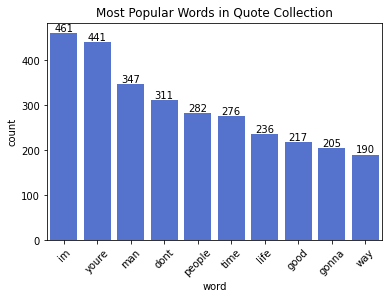

In [9]:
viz.plot_word_barchart(x='word', y='count', sort=1, show_values=True, save=reports)

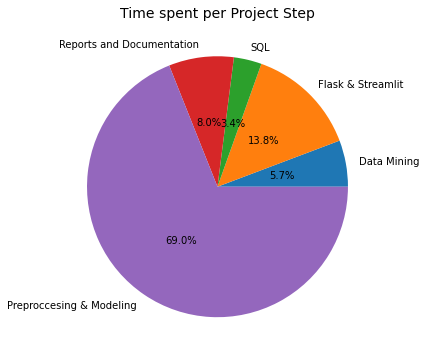

In [6]:
viz.timepie(save=reports)

## 5. Conclusions

### 1. What can you conclude about your data study?
With the base dataset, the available time and the hardware limitations the best model proved to be the basic Character-Level LSTM model. Further investigation is required.

### 2. What would you change if you needed to do another DS project?
For Text Generation with GANs it is required to obtained a much more consistent dataset with a greater length. By that end it would be required better hardware in order to resolve memory errors and most importantly to optimize the current code.

### 3. What do you learn doing this project?
Text Generation is a complex but fascinating field in the Deep Learning spectrum, with GANs being a the top of today's revolutionary models. On the other hand, designing a well-trained GAN requires further investigation and understanding before attempting to design new models.